In [1]:
from TicTacToe import TicTacToe
from Players import RandomPlayer, RandomWinner, RandomWinnerBlocker, Player
from Learners import ReinforcementTicTacToeLearner
from plotting import *

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

import numpy as np
import random

### Example of a game between two random players

In [2]:
p1 = RandomPlayer('O')
p2 = RandomPlayer('X')

game = TicTacToe()
p1_next=True

while True:
    if p1_next:
        p1.move(game)
    else:
        p2.move(game)
        
    p1_next = not p1_next
    game.print_board()
    
    if game.game_over():
        game.print_board()

        print('game over')
        break
    if game.winner():
        game.print_board()

        print(f"Winner: {game.winner()}")
        break


|  O|
|   |
|   |


|  O|
| X |
|   |


|  O|
| X |
|  O|


|X O|
| X |
|  O|


|X O|
| XO|
|  O|


|X O|
| XO|
|  O|


Winner: O


### Train 
- Against 3 different players and plot WLD 
- Then use trained model to play greedy games

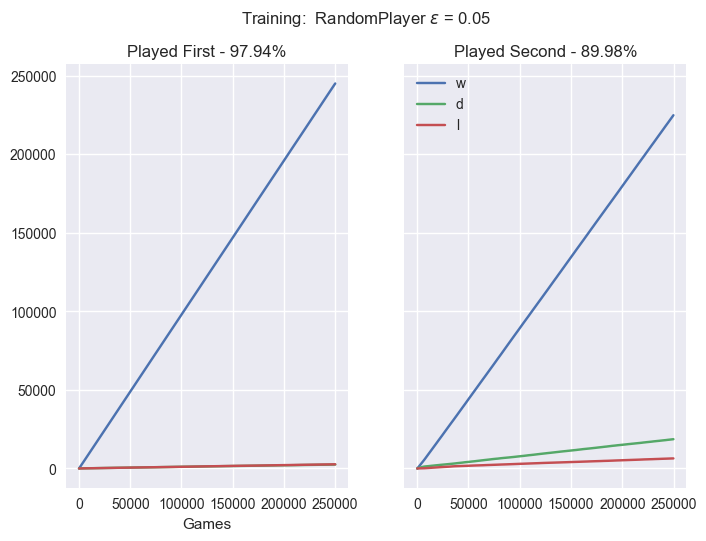

Playing:  RandomPlayer
Played First - 99.51%
Played Second - 93.90%


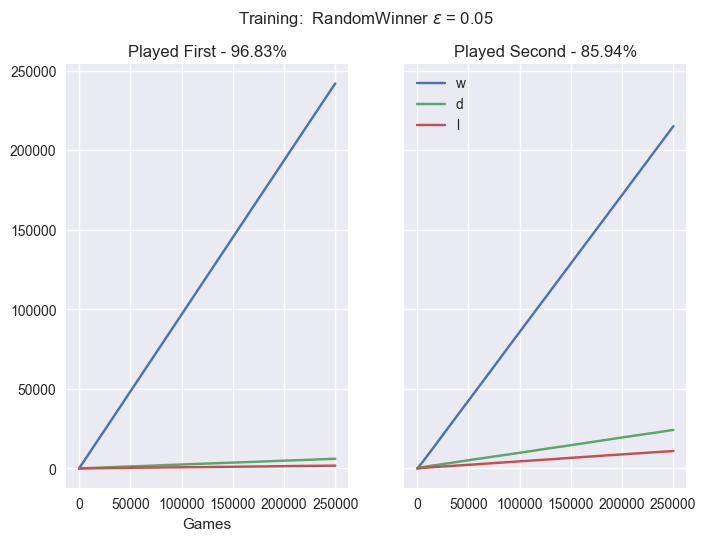

Playing:  RandomWinner
Played First - 99.49%
Played Second - 92.01%


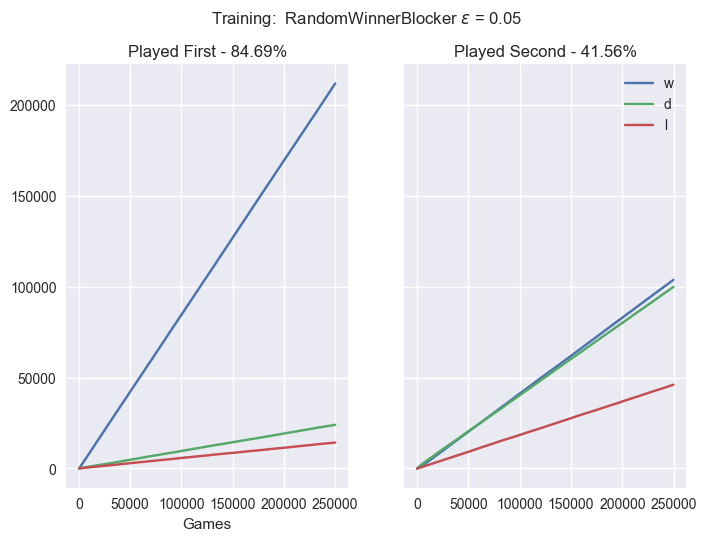

Playing:  RandomWinnerBlocker
Played First - 92.69%
Played Second - 46.59%


In [5]:
games_train = 500_000
games_play = 500_000

states = [None]*3

for idx, opponent in enumerate([RandomPlayer, RandomWinner, RandomWinnerBlocker]):
    rlearner = ReinforcementTicTacToeLearner(
        games_train, 0.05, opponent(player='O'), player='X')

    learn_wld = rlearner.learn()
    play_wld = rlearner.play_n_games(games_play)
    fig, axs = plot_wld(learn_wld)
    fig.suptitle(
        rf"Training:  {type(rlearner.oppoent).__name__} $\epsilon$ = {rlearner.epsilon}")
    plt.legend()

    plt.savefig(f"../../plots/q1/learn_{type(rlearner.oppoent).__name__}.png")
    plt.show()

    
    first_wld, first_win_pct = parse_wld(play_wld, played_first=True)
    second_wld, second_win_pct = parse_wld(play_wld, played_first=False)

    print(f"Playing:  {type(rlearner.oppoent).__name__}")
    print(f"Played First - {first_win_pct:.2f}%")
    print(f"Played Second - {second_win_pct:.2f}%")
